Author: Abhishek Shrivastava. Date: 01/09/2021

# Dependencies
1. openCV - my version 4.4.0.46 
2. PIMS - my version 0.5
3. Scikitimage - my version 0.16.2
4. trackpy - my version 0.4.2
5. distfit

The usual:
1. Numpy - my version 1.16.4
2. Pandas - my version 1.0.5
3. Matplotlib - my version 3.2.2
4. OS

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Extract images from video
Dark cells on light background

In [2]:
# This takes some time. Took about a minute on my computer with a 1500 frame video. 
# Each frame is saved as a tiff file.
import cv2
vidcap = cv2.VideoCapture('BS_1827_vid5.avi')
def getFrame(sec):
    #vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    vidcap.set(cv2.CAP_PROP_FPS, 15.54)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("image"+str(count)+".tiff", image)     # save frame as tiff file
    return hasFrames
sec = 0
frameRate = 1 #//it will capture image in each 1/15.54 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

# 2. Measure centroid of the bacterial cell from one image

# 2.1 Opening the 1st frame

In [5]:
import numpy as np
import pandas as pd
import pims
import matplotlib.pyplot as plt

In [2]:
images = pims.open('./*.tiff') #reading all tiff files

In [3]:
images

<Frames>
Source: /home/OLDMANN/Downloads/1827/1827_vid5/*.tiff
Length: 1500 frames
Frame Shape: (1024, 1280, 3)
Pixel Datatype: uint8

In [4]:
print(images[0])  # the first frame

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


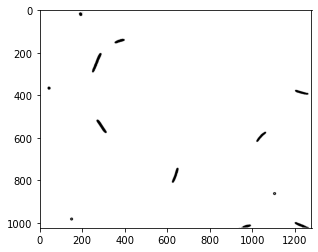

In [8]:
plt.imshow(images[0]) # the first frame
# Can also check other frames . eg. plt.imshow(images[1400])

# 2.2 Determining the correct threshold

In [9]:
from skimage.color import rgb2gray
gs = rgb2gray(images[0])
gs2=1-gs

In [10]:
gs2 # the number below will help develop an intution of the threshold

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

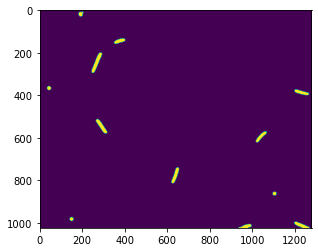

In [11]:
#blur = cv2.GaussianBlur(gs2, (0,0), sigmaX=10, sigmaY=10, borderType = cv2.BORDER_DEFAULT)
from skimage.filters import gaussian
blurred = gaussian(gs2, sigma=.9)
thresh = 0.01 # Adjust the threshold here
binary = blurred > thresh
plt.imshow(binary)

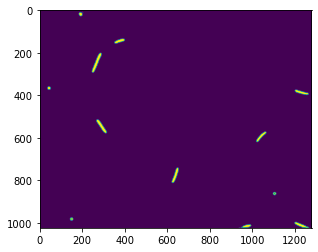

In [12]:
plt.imshow(blurred)

In [13]:
blur = cv2.GaussianBlur(binary, (0,0), sigmaX=6, sigmaY=6, borderType = cv2.BORDER_DEFAULT)

NameError: name 'cv2' is not defined

In [14]:
plt.imshow(blur)

NameError: name 'blur' is not defined

In [15]:
binary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# Note: Proceed only if threshold above is good

# 2.3 Measuring the centroid of one frame

In [16]:
from skimage import measure
labels = measure.label(binary)
props = measure.regionprops(labels)
lr =[]
aa2=[]
for prop in props:
    print('Label: {} >> Area: {}'.format(prop.label, prop.area))
    aa = [prop.label,prop.area,prop.centroid,prop.major_axis_length,prop.minor_axis_length]
    aa2 += aa
    lr.append(aa)

Label: 1 >> Area: 386
Label: 2 >> Area: 819
Label: 3 >> Area: 1676
Label: 4 >> Area: 284
Label: 5 >> Area: 974
Label: 6 >> Area: 1319
Label: 7 >> Area: 967
Label: 8 >> Area: 1210
Label: 9 >> Area: 257
Label: 10 >> Area: 260
Label: 11 >> Area: 1003
Label: 12 >> Area: 715


Decide the area threshold based on the numbers above

In [17]:
from pandas import DataFrame
Outprops = DataFrame (lr,columns=['Cell#_arbit','Area','Centroid','Majoraxis','Minoraxis'])
Outprops

,Cell#_arbit,Area,Centroid,Majoraxis,Minoraxis
0,1,386,"(18.11139896373057, 191.91450777202073)",24.923310,21.090115
1,2,819,"(145.00732600732601, 374.1904761904762)",57.123955,18.536409
2,3,1676,"(246.23806682577566, 266.4385441527446)",113.229035,19.323243
3,4,284,"(366.3380281690141, 42.105633802816904)",19.384089,18.678818
4,5,974,"(386.72792607802876, 1230.2833675564682)",75.506852,16.841809
5,6,1319,"(545.6512509476877, 289.18271417740715)",87.250766,19.591865
6,7,967,"(594.0258531540848, 1039.5822130299896)",73.532847,17.492536
7,8,1210,"(775.9991735537191, 636.7239669421488)",86.104011,18.402502
8,9,257,"(861.7782101167315, 1103.4591439688716)",18.661554,17.544794
9,10,260,"(981.3423076923077, 148.2423076923077)",18.249422,18.152087


In [19]:
# Apply area filer here
at = 900
df3 = Outprops[~(Outprops['Area'] <= at)]  
df3

,Cell#_arbit,Area,Centroid,Majoraxis,Minoraxis
2,3,1676,"(246.23806682577566, 266.4385441527446)",113.229035,19.323243
4,5,974,"(386.72792607802876, 1230.2833675564682)",75.506852,16.841809
5,6,1319,"(545.6512509476877, 289.18271417740715)",87.250766,19.591865
6,7,967,"(594.0258531540848, 1039.5822130299896)",73.532847,17.492536
7,8,1210,"(775.9991735537191, 636.7239669421488)",86.104011,18.402502
10,11,1003,"(1010.4705882352941, 1228.21036889332)",76.242894,17.365179


### Is the result of the cell below similar to the number of cells that you can manually count in the image below? If yes, all is good. You can proceed with the for loop.

Number of cells =  6


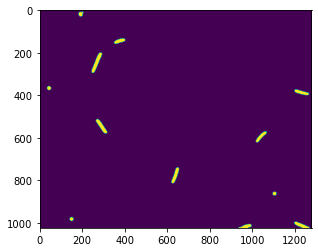

In [20]:
ncells = df3.shape[0]
print('Number of cells = ', ncells)
plt.imshow(binary)

# 3. Use for loop and measure centroid from all images (frames)

In [21]:
# This loop will take some time. For 1500 frames, ~10 cell/frame, it took 1.5 minutes
frame = 0
Outprops2 = pd.DataFrame([])

for image in images:
    gs1 = rgb2gray(image)
    gs2_1=1-gs1
    #blur = cv2.GaussianBlur(gs2_1, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)
    blurred = gaussian(gs2_1, sigma=.9)
    binary1 = blurred > thresh
    labels = measure.label(binary1)
    props = measure.regionprops(labels)
    
    lr1 =[]
    frame = frame + 1 
    for prop in props:
        #print('Label: {} >> Area: {}'.format(prop.label, prop.area))
        centroid = [prop.centroid]
        cpx = centroid[0][0]
        
        cpy = centroid[0][1]
        aa1 = [prop.area,cpx,cpy,prop.major_axis_length,prop.minor_axis_length,frame]
        lr1.append(aa1)
        
    
    Outprops1 = DataFrame(lr1,columns=['mass','x','y','Majoraxis','Minoraxis','frame'])    
    # Apply area filer here
    
    Outprops2 = Outprops2.append(Outprops1)
    df3 = Outprops2[~(Outprops2['mass'] <= at)]  # this is the area filter to remove noise
    df3.to_csv('test.csv')


/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outprops2 = Outprops2.append(Outprops1)
/tmp/ipykernel_3518/1207063392.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

In [6]:
df3 =  pd.read_csv('test.csv') #Only needed when reanalyzing and starting from the middle

# 4. Plot the Centroid for all frames

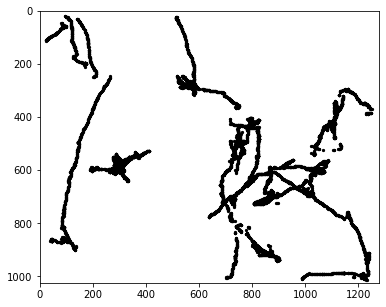

In [7]:
plt.scatter(df3['y'],df3['x'], s=5, color='black')
# x and y swapped from original code. allows tracks to represent original motion of cells in the video. (Gosai)
# y axis inverted instead of x of the original code to achieve ^.(Gosai)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([0, 1280])
plt.ylim([0, 1024])
plt.gca().invert_yaxis()
plt.savefig('Z123.png', dpi=700)

# 4.1 Time as colormap

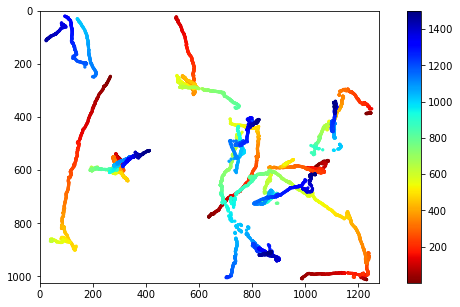

In [8]:
plt.scatter(df3['y'],df3['x'], s=5, c=df3['frame'], cmap="jet_r")
plt.gca().invert_yaxis()
# the x/y swapping and inverting y instead of x done here as well to have this plot resemble the one above (Gosai)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([0, 1280])
plt.ylim([0, 1024])
plt.gca().invert_yaxis()
plt.colorbar()

Exercise: Use time rather than nFrames for colormap. 
What is the frame rate?

# 5. Extra: Delete all tiff images (if needed)

In [9]:
import os
cwd = os.getcwd()
import os

dir_name = cwd
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".tiff"):
        os.remove(os.path.join(dir_name, item))

# 6. Implementing Trackpy for joining the tracks and filtering

In [10]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

from pandas import DataFrame, Series  # for convenience

import trackpy as tp

# 6.1 Link features into particle trajectories
We have the locations of the particles in each frame. Next we'll track particles from frame to frame, giving each one a number for identification.
First, we must must specify a maximum displacement, the farthest a particle can travel between frames. We should choose the smallest reasonable value because a large value slows computation time considerably. In this case, 20 pixels is reasonable.
Second, we allow for the possibility that a particle might be missed for a few frames and then seen again. (Perhaps its "mass" slipped below our cutoff due to noise in the video.) Memory keeps track of disappeared particles and maintains their ID for up to some number of frames after their last appearance. Here we use 4 frames.

In [81]:
tp.quiet()  # Turn off progress reports for best performance
t = tp.link(df3, 20, memory=20)

The result is the features DataFrame with an additional column, particle, identifying each feature with a label. We denote this new DataFrame t.

In [82]:
# t

# 6.2  Filter spurious trajectories
We have more filtering to do. Ephemeral trajectories — seen only for a few frames — are usually spurious and never useful. The convenience function filter_stubs keeps only trajectories that last for a given number of frames.

In [83]:
t1 = tp.filter_stubs(t, 400)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 44
After: 8


We can also filter trajectories by their particles' appearance. At this stage, with trajectories linked, we can look at a feature's "average appearance" throughout its trajectory, giving a more accurate picture.

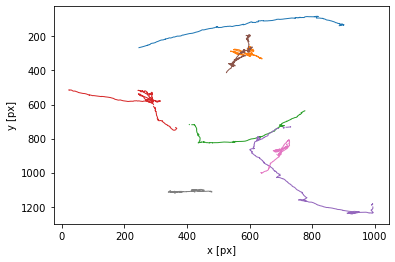

In [84]:
plt.figure()
tp.plot_traj(t1);

# Speed calculation

In [16]:
tm1=pd.DataFrame(data=t1, columns=['x', 'y', 'frame','particle'])

In [17]:
tm1.columns = ['x', 'y','frameN','particle']

In [18]:
tm2=tm1.sort_values(by=['particle','frameN'], ascending=True)

In [19]:
tm2.to_csv('tm2.csv')

In [23]:
tm2 = pd.read_csv('tm2.csv') #Only needed when reanalyzing and starting from the middle

In [24]:
plt.close('all')

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 0.139673] [loc=1.875 scale=1.136]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[genextreme] [0.03 sec] [RSS: 0.199954] [loc=1.371 scale=0.965]
[distfit] >Compute confidence interval [parametric]


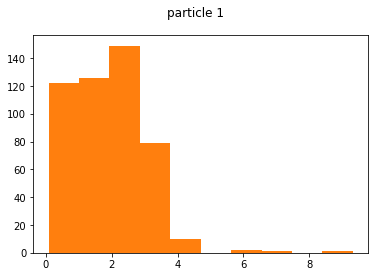

[distfit] >plot..


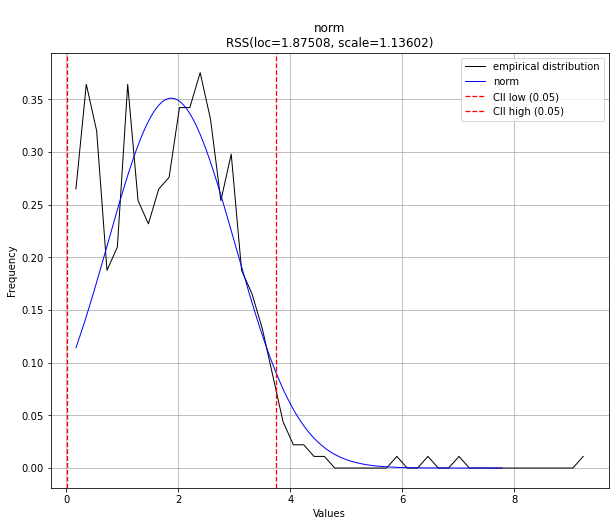

[distfit] >plot..


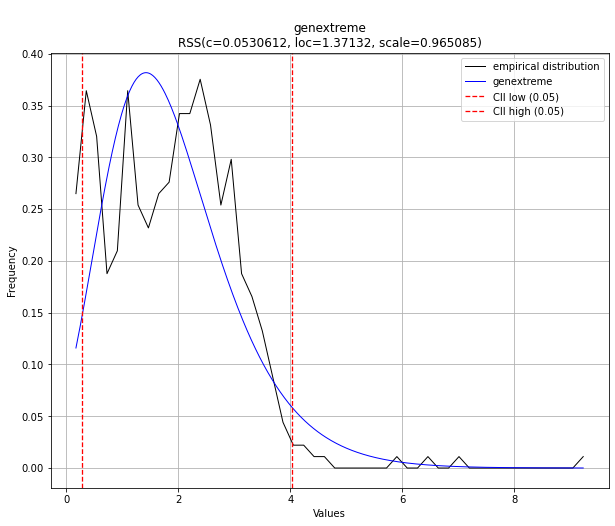

2
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 0.34278] [loc=1.365 scale=0.914]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[genextreme] [0.03 sec] [RSS: 0.314188] [loc=0.939 scale=0.726]
[distfit] >Compute confidence interval [parametric]


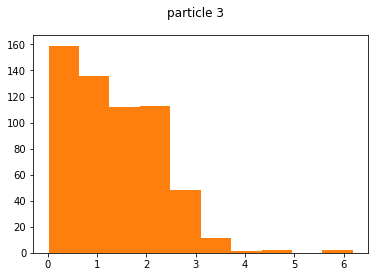

[distfit] >plot..


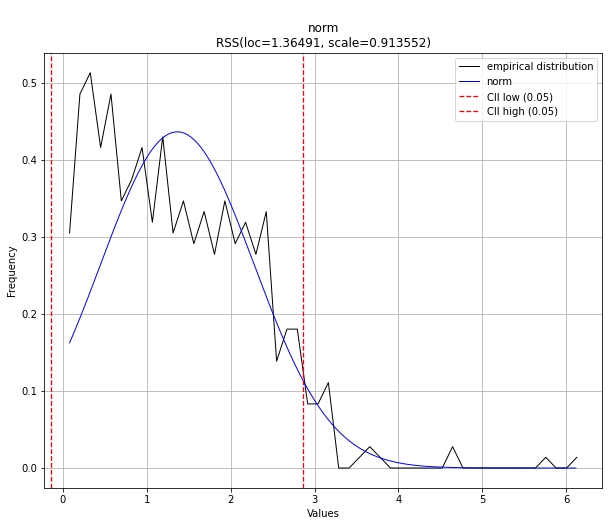

[distfit] >plot..


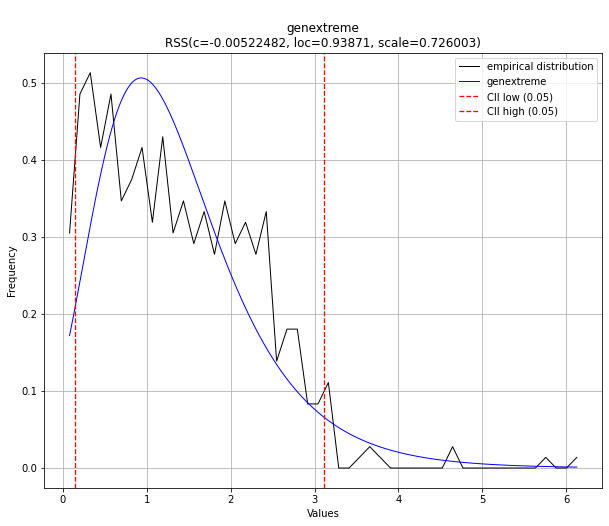

3
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 0.155382] [loc=1.359 scale=0.927]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[genextreme] [0.03 sec] [RSS: 0.124927] [loc=0.928 scale=0.676]
[distfit] >Compute confidence interval [parametric]


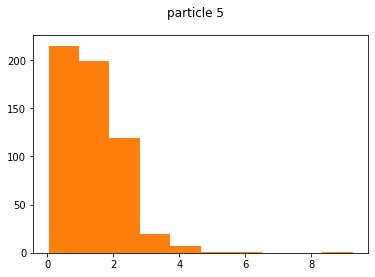

[distfit] >plot..


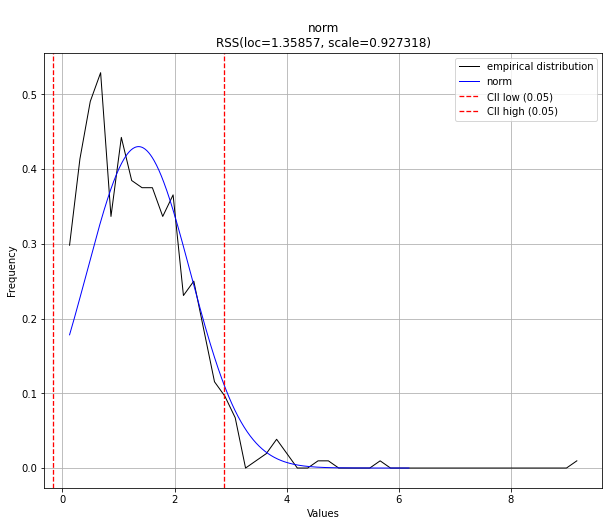

[distfit] >plot..


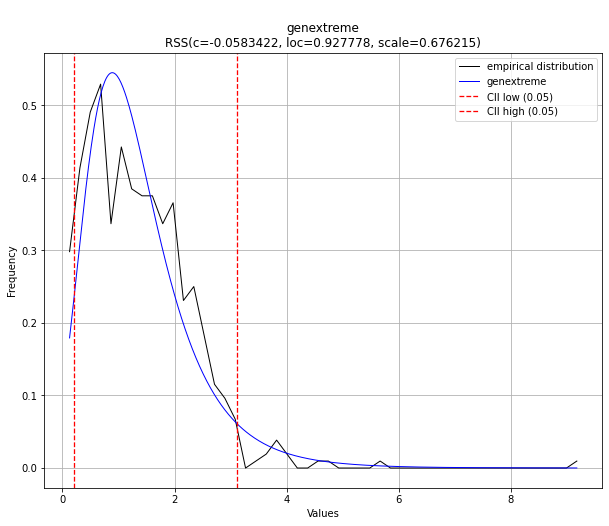

3
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 0.0470485] [loc=1.671 scale=1.175]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[genextreme] [0.05 sec] [RSS: 0.0695775] [loc=1.163 scale=0.824]
[distfit] >Compute confidence interval [parametric]


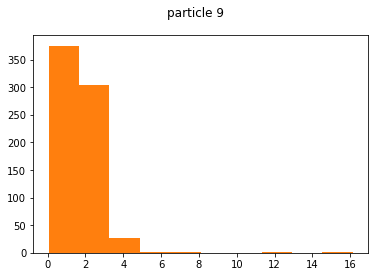

[distfit] >plot..


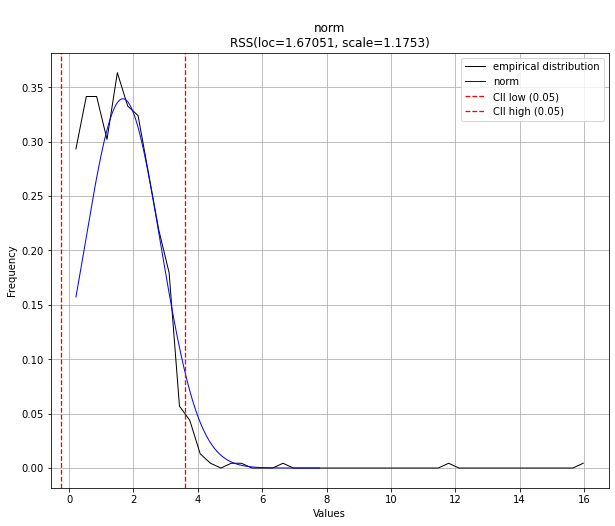

[distfit] >plot..


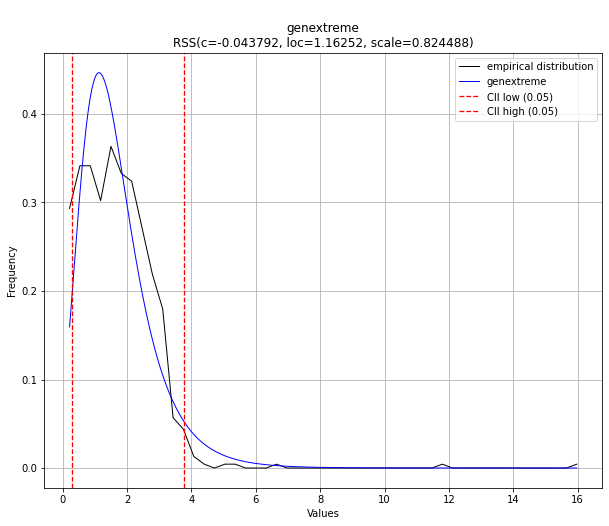

2
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 0.0704802] [loc=1.658 scale=1.256]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[genextreme] [0.05 sec] [RSS: 0.0455235] [loc=1.098 scale=0.812]
[distfit] >Compute confidence interval [parametric]


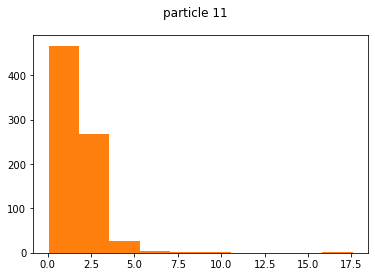

[distfit] >plot..


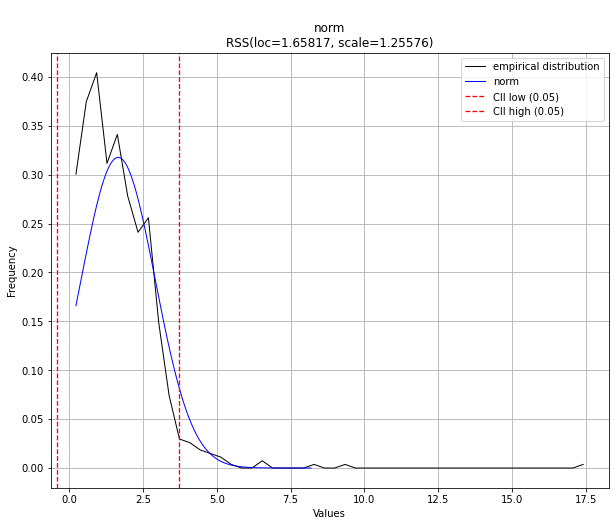

[distfit] >plot..


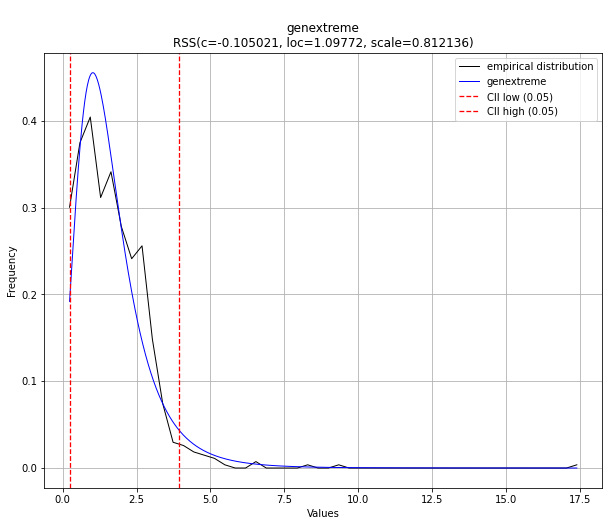

2
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 0.254149] [loc=1.158 scale=0.934]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[genextreme] [0.05 sec] [RSS: 0.0541435] [loc=0.708 scale=0.554]
[distfit] >Compute confidence interval [parametric]


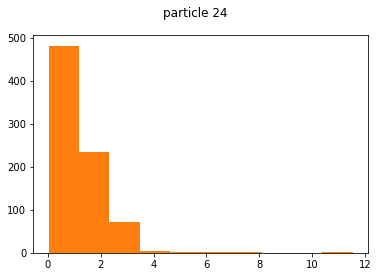

[distfit] >plot..


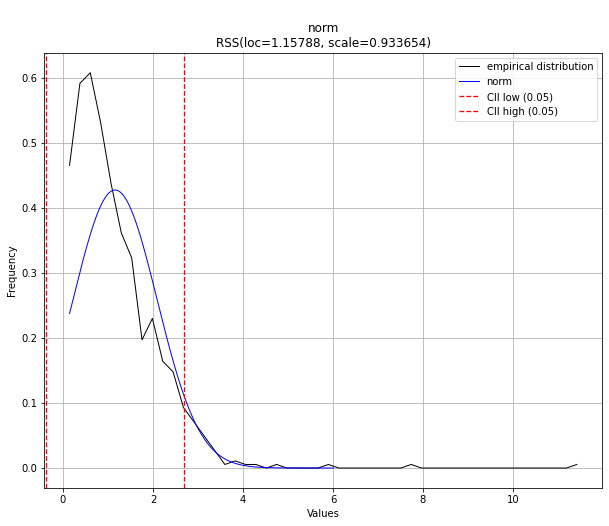

[distfit] >plot..


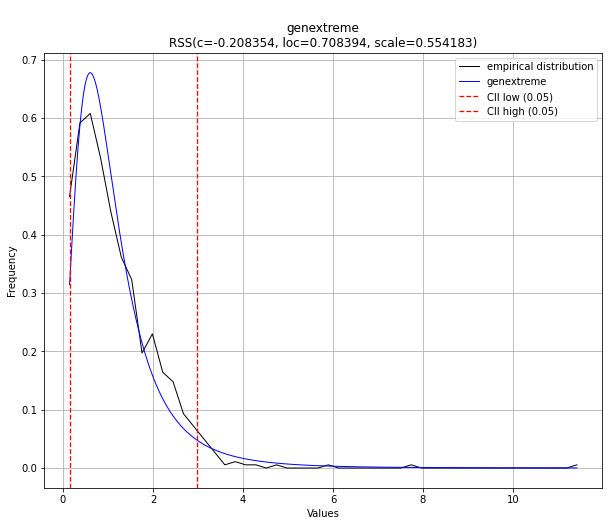

3
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 0.435213] [loc=1.538 scale=0.943]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[genextreme] [0.03 sec] [RSS: 0.430468] [loc=1.112 scale=0.786]
[distfit] >Compute confidence interval [parametric]


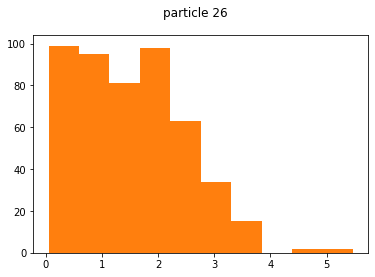

[distfit] >plot..


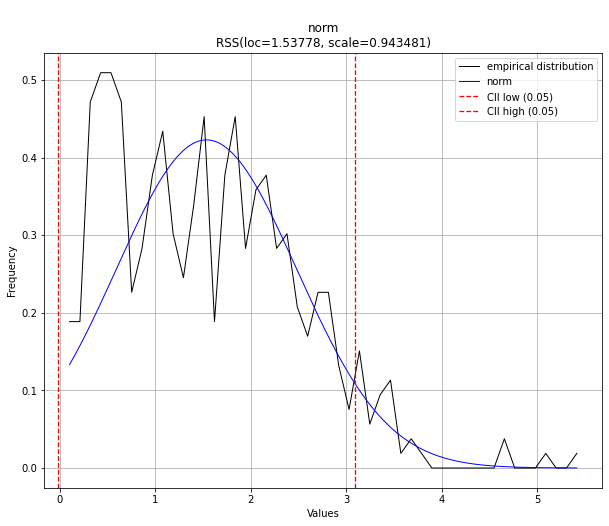

[distfit] >plot..


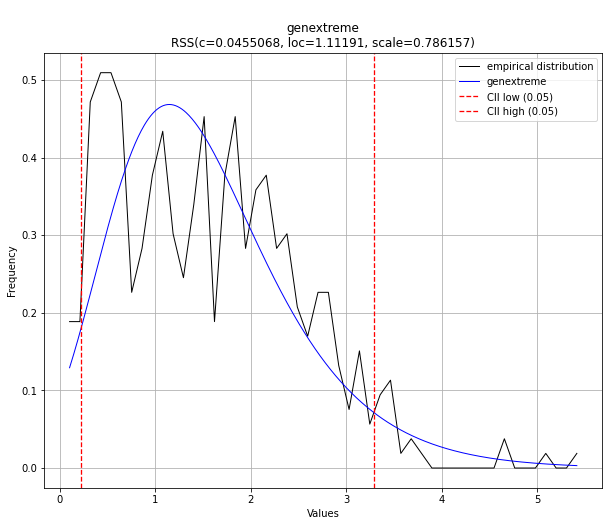

2
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 0.370535] [loc=1.301 scale=0.969]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[genextreme] [0.03 sec] [RSS: 0.259236] [loc=0.825 scale=0.657]
[distfit] >Compute confidence interval [parametric]


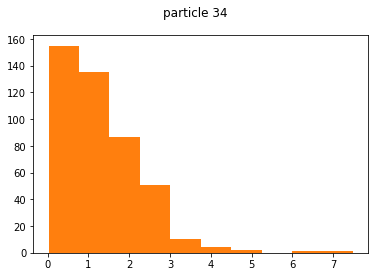

[distfit] >plot..


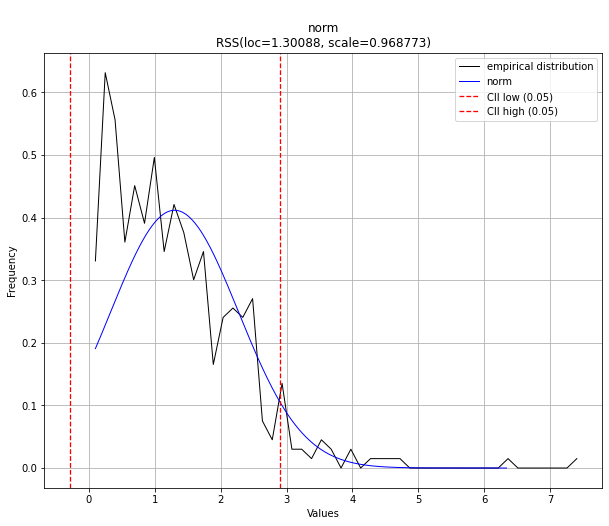

[distfit] >plot..


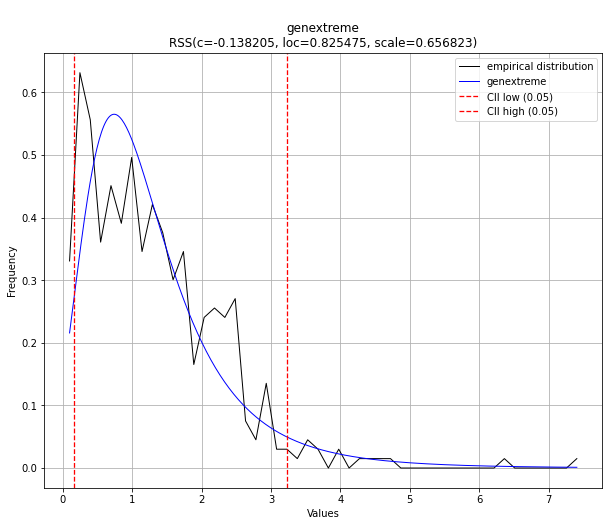

3


In [25]:
import matplotlib.pyplot as plt 
%matplotlib inline
q=tm2.particle.unique()
mu=[]


for ii in q:
    track=tm2.loc[tm2.particle==ii, ['frameN', 'x','y','particle']]
    x=track["x"]
    x1=np.diff(x)
    y=track["y"]
    y1=np.diff(y)
    
    dist=np.sqrt((y1)**2 + (x1)**2)
    dist=dist * 0.07    #(change pixel to micron)
    
    time=track["frameN"]
    time=np.diff(time)
    time =(time*0.066) #(change 1/frames per second)(#the frame rate being 15 fps)
    
    speed =(dist/time)
    
    """in the following lines, the code prompts for user input to select the more appropriate distribution fit, 
    depending on the response, either 'normal' or 'genextreme' distribution of distfit are applied"""
   
    plt.hist(speed)
    plt.suptitle(f"particle {ii+1}")
    plt.show
    from distfit import distfit
    speed2 = distfit(distr='norm')
    speed3 = distfit(distr='genextreme')
    speed2.fit_transform(speed)
    speed3.fit_transform(speed)
    plt.hist(speed)
    plt.suptitle(f"particle {ii+1}")
    plt.show()
    speed2.plot()
    plt.show()
    speed3.plot()
    plt.show()
    mu2=speed2.model['loc']
    mu3=speed3.model['loc']
    
    selected_fit = int(input())
    #plt.close()
    if selected_fit == int(2):
        mu+=[mu2]
    else:
        mu+=[mu3]
        
#     mu +=[mu2]

    

## txx = ["ff", 'dd'] 
fii = []
for i in txx:
    fii.append(i)
print(fii)

In [26]:
 from distfit import distfit
mumu = distfit(distr='norm')
mumu.fit_transform(mu)
mumu.plot()
plt.hist(mu, bins="auto")

[distfit] >fit..
[distfit] >transform..


AttributeError: 'list' object has no attribute 'dtype'

In [27]:
mumu.model

AttributeError: 'distfit' object has no attribute 'model'

In [28]:
mu1=pd.DataFrame(mu)

In [29]:
mu1.columns =['speed']

In [30]:
mu1

,speed
0,1.875078
1,0.938710
2,0.927778
3,1.670508
4,1.658169
5,0.708394
6,1.537777
7,0.825475


In [31]:
%%javascript
IPython.notebook.kernel.execute('nb_name_pre = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [32]:
x = nb_name_pre
size = len(x)
# Slice string to remove last character from string
nb_name = x[:size - 6]
print(nb_name)

1827_vid5_AS


In [33]:
mu1.to_csv("%s.csv" % nb_name)

In [34]:
#this cell renames the penultimate column in the csv i.e. 'frame' as  'frame.1' : reqd in next code (Gosai)
t4csv = t1
t4csv.rename(columns={ t4csv.columns[5]: "frame.1" }, inplace = True)

In [35]:
%%javascript
IPython.notebook.kernel.execute('nb_name_4csv = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [36]:
x1 = nb_name_4csv
size = len(x1)
# Slice string to remove last character from string
nb_name1 = x1[:size - 6]
nb_name2 = 'levy_input_'
nb_name3 = (nb_name2+nb_name1)

In [37]:
t4csv.to_csv("%s.csv" % nb_name3)

In [38]:
#Need to remove Header row from .csv file for next code to work

In [52]:
# df = pd.read_csv("levy_input_1827_vid5_AS.csv", header=None)
# df = df.iloc[1: , :]
# df2 = df.drop(df.columns[[1]],axis = 1)
# df2

,0,2,3,4,5,6,7,8
1,1,1676,246.2380668257757,266.4385441527446,113.22903545315158,19.323243497606228,1,0
2,1,1319,545.6512509476877,289.18271417740715,87.25076552597719,19.59186531777252,1,2
3,1,1210,775.9991735537191,636.7239669421488,86.10401105156154,18.402501535018803,1,4
4,2,1699,248.4396703943496,265.5167745732784,114.17893594833797,19.430990994765548,2,0
5,2,1300,545.7476923076923,289.2661538461538,87.34867641376921,19.27377271219761,2,2
...,...,...,...,...,...,...,...,...
4849,1498,1246,526.1404494382023,412.6300160513644,90.2817938802619,18.024819396650923,1498,23
4850,1499,932,360.67489270386267,1110.8100858369098,76.1569341966449,15.971513108548557,1499,33
4851,1499,1242,526.0909822866345,413.00402576489535,89.51270454226866,18.033249686622117,1499,23
4852,1500,946,360.2262156448203,1110.8837209302326,76.3826291236033,16.195139313157043,1500,33


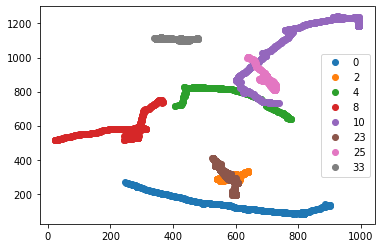

In [74]:
df = pd.read_csv("levy_input_1827_vid5_AS_dtct.csv", header=None)
df.columns = ["frame","Unnamed: 0","mass","x", "y","maja","mina","frame.1","particle" ]
df
groups = df.groupby("particle")
for xxx, group in groups:
    plt.plot(group["x"], group["y"], marker="o", linestyle="", label=xxx)
plt.legend()